<a href="https://colab.research.google.com/github/BugPersonality/ML/blob/main/Linear_Regression_lab_3_1_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [22]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [23]:
X, X_train, y_train, X_test, y_test = generate_data(100)

xtemp = np.array([])
onesA = np.ones(len(X_train))

for arr in X_train:
    xtemp = np.append(xtemp, arr[0])

A = np.stack((onesA, xtemp), axis = -1)

# print(X)
# print(A)
# print(y_train) 


Generated 50 train samples and 50 test samples


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [25]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

wb = np.dot(np.dot(np.linalg.inv(np.dot(A.transpose(), A)), A.transpose()), y_train)
y_pred = np.dot(X_test, wb[1]) + wb[0]

mean_absolute_error_test = 0
mean_squared_error_test = 0

for index in range(len(y_pred)):
    mean_absolute_error_test += abs(y_test[index] - y_pred[index])
    mean_squared_error_test += pow((y_pred[index] - y_test[index]), 2)

mean_absolute_error_test = mean_absolute_error_test / len(y_pred)
mean_squared_error_test = mean_squared_error_test / len(y_pred)

print("My solution") 
print("w =", wb[1], "b =", wb[0])
print('Mean Absolute Error:', mean_absolute_error_test)
print('Mean Squared Error:', mean_squared_error_test)

My solution
w = 10.216949715299178 b = -7.051464406551825
Mean Absolute Error: [9.25203104]
Mean Squared Error: [130.96994893]


In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_regressor = regressor.predict(X_test)
print("Sklearn") 
print("w =", regressor.coef_[0], "b =", regressor.intercept_)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_regressor))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_regressor))

Sklearn
w = 10.216949715299176 b = -7.051464406551826
Mean Absolute Error: 9.252031044808623
Mean Squared Error: 130.96994892748467


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [27]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [28]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

xtemp_2 = np.array([])
onesA_2 = np.ones(len(data['x_train']))

for arr in data['x_train']:
    xtemp_2 = np.append(xtemp_2, arr)

A2 = np.stack((onesA_2, xtemp_2), axis = -1)

wb = np.dot(np.dot(np.linalg.inv(np.dot(A2.transpose(), A2)), A2.transpose()), data['y_train'])

y_pred = np.dot(data['x_train'], wb[1]) + wb[0]


mean_absolute_error_test = 0
mean_squared_error_test = 0

for index in range(len(y_pred)):
    mean_absolute_error_test += abs(data['y_train'][index] - y_pred[index])
    mean_squared_error_test += pow((y_pred[index] - data['y_train'][index]), 2)

mean_absolute_error_test = mean_absolute_error_test / len(y_pred)
mean_squared_error_test = mean_squared_error_test / len(y_pred)

print("w =", wb[1], "b =", wb[0])
print('Mean Absolute Error:', mean_absolute_error_test)
print('Mean Squared Error:', mean_squared_error_test)


w = -0.3060142548709807 b = 1.9447221573577482
Mean Absolute Error: 0.4709667566989466
Mean Squared Error: 0.3157000484249221


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [29]:
from sklearn.preprocessing import PolynomialFeatures

def draw(degree):
    plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 's', alpha=0.8, label='data')
    dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat)

    errr = np.mean((data['y_train'] - y_hat)**2)
    plt.title(f'degree = {degree}, err = {errr}')

    plt.show()
    return (np.mean((data['y_train'] - y_hat)**2), degree)



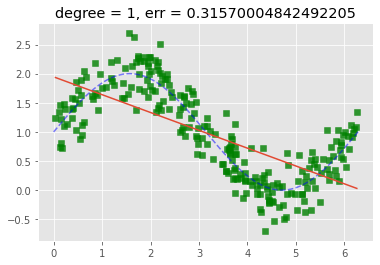

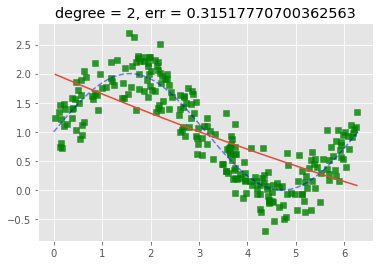

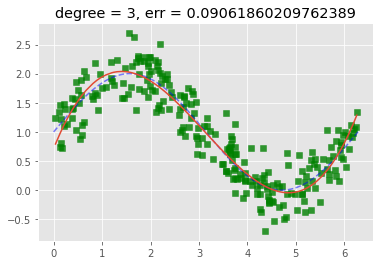

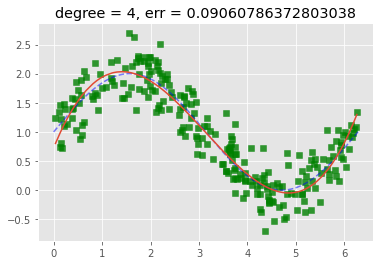

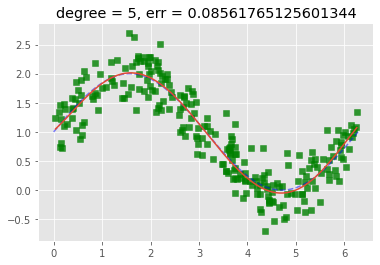

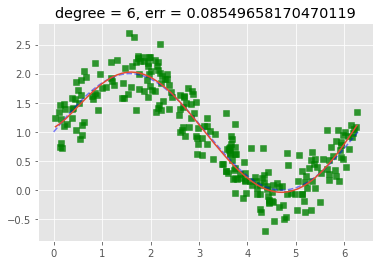

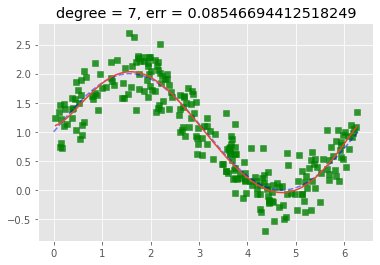

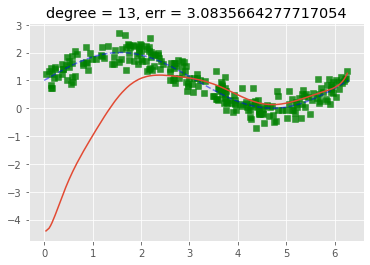

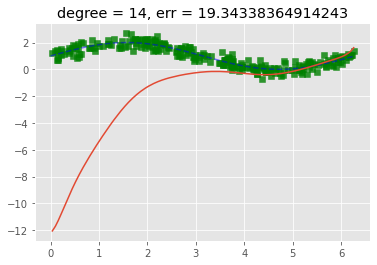

Полином 7 степени подходит больше других т.к. ошибка минимальная 0.08546694412518249


In [30]:
err = {}
degrees = [1, 2, 3, 4, 5, 6, 7, 13, 14]

for degree in degrees:
    error, nDegree = draw(degree)
    err[nDegree] = error

bestDegree = min(err.items(), key=lambda x: x[1])[0]
minErr = min(err.items(), key=lambda x: x[1])[1] 

print(f"Полином {bestDegree} степени подходит больше других т.к. ошибка минимальная {minErr}")


# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [31]:
from sklearn.datasets import load_boston

data_ = load_boston()
X = pd.DataFrame(data_['data'], columns=data_['feature_names'])
Y = data_['target']

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

## Задание 3.4

In [32]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

scaler = StandardScaler()
regressor = LinearRegression()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
regressor.fit(X_train, y_train)

y_train_prediction = regressor.predict(X_train)
y_test_prediction = regressor.predict(X_test)

print("All: ")
print('MAE:', mean_absolute_error(y_train, y_train_prediction))
print('MSE:', mean_squared_error(y_train, y_train_prediction))


newData = pd.DataFrame({'f': X.columns, 'w': np.abs(regressor.coef_)}).sort_values(by='w', ascending=False).head(7)

X_train, X_test, y_train, y_test = train_test_split(X[newData["f"]], Y, train_size=0.7)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
regressor.fit(X_train, y_train)

y_train_prediction = regressor.predict(X_train)
y_test_prediction = regressor.predict(X_test)

print("top 7: ")
print('MAE:', mean_absolute_error(y_train, y_train_prediction))
print('MSE:', mean_squared_error(y_train, y_train_prediction))

All: 
MAE: 3.195896616463397
MSE: 19.356439174723175
top 7: 
MAE: 3.255286615788527
MSE: 20.36004306670566


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Lasso Regression

class LassoRegression() :
	def __init__( self, learning_rate, iterations, l1_penality ) :
		self.learning_rate = learning_rate
		self.iterations = iterations
		self.l1_penality = l1_penality
			
	def fit( self, X, Y ) :
		self.m, self.n = X.shape
		self.W = np.zeros( self.n )
		self.b = 0
		self.X = X	
		self.Y = Y
		for i in range( self.iterations ):
			self.update_weights()
		return self
	
	def update_weights( self ) :
		Y_pred = self.predict( self.X )
		dW = np.zeros( self.n )
		
		for j in range( self.n ):
			if self.W[j] > 0 :
				dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred )) + self.l1_penality ) / self.m
			else :
				dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred )) - self.l1_penality ) / self.m
		db = - 2 * np.sum( self.Y - Y_pred ) / self.m
		self.W = self.W - self.learning_rate * dW
		self.b = self.b - self.learning_rate * db
		return self
	
	def predict( self, X ) :
		return X.dot( self.W ) + self.b
	

def main() :
	# Importing dataset
	df = pd.read_csv( "salary_data.csv" )
	X = df.iloc[:, :-1].values
	Y = df.iloc[:, 1].values
	
	# Splitting dataset into train and test set

	X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1 / 3, random_state = 0 )
	
	# Model training
	
	model = LassoRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 500 )
	model.fit( X_train, Y_train )
	
	# Prediction on test set

	Y_pred = model.predict( X_test )
	
	print( "Predicted values ", np.round( Y_pred[:3], 2 ) )
	print( "Real values	 ", Y_test[:3] )
	print( "Trained W	 ", round( model.W[0], 2 ) )
	print( "Trained b	 ", round( model.b, 2 ) )
	
	# Visualization on test set
	
	plt.scatter( X_test, Y_test, color = 'blue' )
	plt.plot( X_test, Y_pred, color = 'orange' )	
	plt.title( 'Salary vs Experience' )	
	plt.xlabel( 'Years of Experience' )
	plt.ylabel( 'Salary' )
	plt.show()
	

if __name__ == "__main__" :
	main()

